In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [9]:
gdp = pd.read_csv('../../dataset/Indicators/gdp.csv', encoding='unicode_escape')
pmi = pd.read_csv ('../../dataset/Indicators/pmi_.csv', encoding='unicode_escape')
unemployment_rate = pd.read_csv ('../../dataset/Indicators/unemployment_rate.csv', encoding='unicode_escape')
cpi = pd.read_csv ('../../dataset/Indicators/cpi_yoy.csv', encoding='unicode_escape')

In [10]:
def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '2010-06-01') & (df.index <= '2022-11-02')]
    return df

In [11]:
gdp = cleaned_indicator(gdp)
pmi = cleaned_indicator(pmi)
unemployment_rate = cleaned_indicator(unemployment_rate)
cpi = cleaned_indicator(cpi)


In [12]:
cpi.head()

,close
Dates,
2010-06-01,1.100000
2010-06-02,1.103333
2010-06-03,1.106667
2010-06-04,1.110000
2010-06-05,1.113333


In [88]:
def deflation():
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
    fig.suptitle('Deflation Conditions (Slower Growth and Slow Inflation)')
    comment_txt = '''\
    In the next months PMI, GDP and CPI are going to slow down.\nUnemployment rates are going to increase as economic activity deteriorates.
    '''
    plt.figtext(0.18, -0.1, comment_txt)

    #ax1
    pmi.close.plot.line(ax = ax1)
    ax1.axhline(y=50, c="red", linewidth=2, zorder=0)
    ax1.set_title('US ISM Manufacturing Purchasing Managers Index (PMI)')
    ax1.set(xlabel='Years', ylabel='%')

    #ax2
    gdp.close.plot.line(ax = ax2)
    ax2.set_title('US Gross Domestic Product Change YoY')
    ax2.set(xlabel='Years', ylabel='%')

    #ax3
    unemployment_rate.close.plot.line(ax = ax3)
    ax3.set_title('US Unemployment Rate')
    ax3.set(xlabel='Years', ylabel='%')

    #ax4
    cpi.close.plot.line(ax = ax4)
    ax4.set_title('US Consumer Price Index ')
    ax4.set(xlabel='Years', ylabel='%')

    #plot
    fig.tight_layout()
    plt.style.use('seaborn')
    return plt.show()

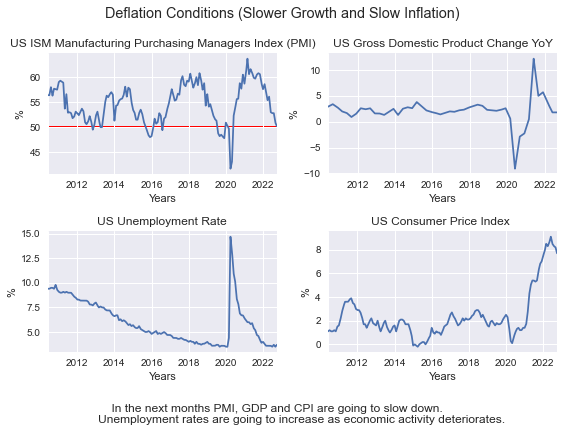

In [89]:
deflation()